In [1]:
#import required packages..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import itertools
import warnings
warnings.filterwarnings("ignore")
from dateutil import relativedelta
import tensorflow as tf

In [3]:
df = pd.read_excel('Data.xlsx')

In [4]:
df=df[['Date','Key','Volume','avg_T','precipitation']]

In [5]:
df = X.copy()

In [6]:
df.Date = pd.to_datetime(df.Date,format='%d-%m-%Y')
Brand_list = ['BUD']
#Brand_list = X.Key.unique()

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

final = pd.DataFrame()

for brand_name in Brand_list:
    print(brand_name)
    brand_df = df.loc[df.Key == brand_name]
    brand_df.set_index('Date',inplace=True)
    tmp = []
    forecast = pd.DataFrame()
    Actuals = pd.DataFrame()
    Actual_backup = brand_df[['Volume']]
    for i in range(7,0,-1):
        train_date = brand_df.index.max() - relativedelta.relativedelta(months=i)
        test_date = train_date + relativedelta.relativedelta(months=1)
       
        x = brand_df.drop(columns=['Volume','Key'])
        y = brand_df[['Volume']]
        
        X_st = StandardScaler()
        x_transformed = X_st.fit_transform(x)
        
        
        y_st = StandardScaler()
        y_tranformed = y_st.fit_transform(y)
        
        x_final = pd.DataFrame(x_transformed,index=brand_df.index,columns=x.columns)
        y_final = pd.DataFrame(y_tranformed,index=brand_df.index,columns=y.columns)
        
        train_x = x_final[:train_date]
        train_y = y_final[:train_date][['Volume']]
        test_x = x_final[test_date:test_date]
        test_y = y_final[test_date:test_date][['Volume']]
        
        
        # define generator
        n_input = 24
        n_features = len(X.columns)-3
        generator = TimeseriesGenerator(np.array(train_x), np.array(train_y), length=n_input, batch_size=1)

        
        
        
        
        
#         #apply scaler transformation before LSTM here standard scaler applied...
#         X_st = StandardScaler()
#         train_x = X_st.fit_transform(train_x)

#         y_st = StandardScaler()
#         train_y = y_st.fit_transform(train_y)

#         X_test_st = StandardScaler()
#         test_x = X_test_st.fit_transform(test_x)

#         y_test_st = StandardScaler()
#         test_y = y_test_st.fit_transform(test_y)
        
#         train_x = np.reshape(np.array(train_x), (train_x.shape[0], 1, train_x.shape[1]))
#         test_x = np.reshape(np.array(test_x), (test_x.shape[0], 1, test_x.shape[1]))
        

        
        simple_lstm_model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(32,return_sequences=True,input_shape=(n_input, n_features)),
        #tf.keras.layers.Dropout(0.2),   #apply dropout for increase in performance..
        tf.keras.layers.LSTM(16,return_sequences=True),
        #tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)])
        simple_lstm_model.compile(optimizer='adam', loss='mae')
        simple_lstm_model.fit_generator(generator,epochs=100)
        
        first_eval_batch = np.array(train_x[-n_input:])
        current_batch = first_eval_batch.reshape((1, n_input, n_features))
        forecast[str(brand_name)+str('le-')+str(test_date.month)] = y_st.inverse_transform(simple_lstm_model.predict(current_batch))[0][0]
# #         forecast[str(brand_name)+str('le-')+str(test_date.month)] = y_st.inverse_transform(simple_lstm_model.predict(test_x[0].reshape(1,1,x.shape[1]))[0][0])
        Actuals[str(brand_name)+str('Ac-')+str(test_date.month)] =  Actual_backup[test_date:test_date].Volume.values
    tmp1 = forecast.melt()
    tmp2 = Actuals.melt()
    tmp1.columns = [str(brand_name+"le"),str(brand_name+'forecast')]
    tmp2.columns = [str(brand_name+"Ac"),str(brand_name+'Actuals')]
    final = pd.concat([final,tmp1,tmp2],axis=1)

BUD
Epoch 1/100
27/27 [==============================] - 2s 92ms/step - loss: 0.9532: 0s - loss: 0
Epoch 2/100
27/27 [==============================] - 2s 92ms/step - loss: 0.9238
Epoch 3/100
27/27 [==============================] - 2s 88ms/step - loss: 0.8820: 0s - lo
Epoch 4/100
27/27 [==============================] - 2s 89ms/step - loss: 0.7720
Epoch 5/100
27/27 [==============================] - 2s 84ms/step - loss: 0.6385
Epoch 6/100
27/27 [==============================] - 2s 91ms/step - loss: 0.5848
Epoch 7/100
27/27 [==============================] - 2s 89ms/step - loss: 0.5848
Epoch 8/100
27/27 [==============================] - 2s 89ms/step - loss: 0.5700
Epoch 9/100
27/27 [==============================] - 2s 83ms/step - loss: 0.5744
Epoch 10/100
27/27 [==============================] - 2s 90ms/step - loss: 0.5494
Epoch 11/100
27/27 [==============================] - 2s 83ms/step - loss: 0.5155
Epoch 12/100
27/27 [==============================] - 2s 86ms/step - loss: 0.502

27/27 [==============================] - 2s 82ms/step - loss: 0.1367
Epoch 1/100
28/28 [==============================] - 2s 86ms/step - loss: 0.9319
Epoch 2/100
28/28 [==============================] - 2s 85ms/step - loss: 0.8839
Epoch 3/100
28/28 [==============================] - 2s 82ms/step - loss: 0.8432
Epoch 4/100
28/28 [==============================] - 2s 80ms/step - loss: 0.8379
Epoch 5/100
28/28 [==============================] - 2s 82ms/step - loss: 0.6088
Epoch 6/100
28/28 [==============================] - 2s 78ms/step - loss: 0.6386
Epoch 7/100
28/28 [==============================] - 2s 82ms/step - loss: 0.5768
Epoch 8/100
28/28 [==============================] - 2s 82ms/step - loss: 0.5275
Epoch 9/100
28/28 [==============================] - 2s 82ms/step - loss: 0.4774
Epoch 10/100
28/28 [==============================] - 2s 85ms/step - loss: 0.4849
Epoch 11/100
28/28 [==============================] - 2s 89ms/step - loss: 0.4811
Epoch 12/100
28/28 [==================

29/29 [==============================] - 3s 93ms/step - loss: 0.1468
Epoch 98/100
29/29 [==============================] - 3s 98ms/step - loss: 0.1450
Epoch 99/100
29/29 [==============================] - 3s 91ms/step - loss: 0.1274
Epoch 100/100
29/29 [==============================] - 3s 92ms/step - loss: 0.1347
Epoch 1/100
30/30 [==============================] - 3s 85ms/step - loss: 0.9953
Epoch 2/100
30/30 [==============================] - 3s 91ms/step - loss: 0.9628
Epoch 3/100
30/30 [==============================] - 3s 91ms/step - loss: 0.9344
Epoch 4/100
30/30 [==============================] - 3s 98ms/step - loss: 0.8905
Epoch 5/100
30/30 [==============================] - 3s 92ms/step - loss: 0.7236: 1s - l
Epoch 6/100
30/30 [==============================] - 2s 78ms/step - loss: 0.6283
Epoch 7/100
30/30 [==============================] - 3s 86ms/step - loss: 0.5587
Epoch 8/100
30/30 [==============================] - 3s 89ms/step - loss: 0.5628
Epoch 9/100
30/30 [=========

Epoch 96/100
31/31 [==============================] - 2s 79ms/step - loss: 0.1363
Epoch 97/100
31/31 [==============================] - 2s 79ms/step - loss: 0.1355
Epoch 98/100
31/31 [==============================] - 2s 80ms/step - loss: 0.1504
Epoch 99/100
31/31 [==============================] - 3s 89ms/step - loss: 0.1525
Epoch 100/100
31/31 [==============================] - 3s 85ms/step - loss: 0.1460
Epoch 1/100
32/32 [==============================] - 3s 82ms/step - loss: 0.9776
Epoch 2/100
32/32 [==============================] - 3s 81ms/step - loss: 0.9362
Epoch 3/100
32/32 [==============================] - 3s 81ms/step - loss: 0.8878
Epoch 4/100
32/32 [==============================] - 3s 86ms/step - loss: 0.8189
Epoch 5/100
32/32 [==============================] - 3s 82ms/step - loss: 0.6431
Epoch 6/100
32/32 [==============================] - 3s 83ms/step - loss: 0.5785
Epoch 7/100
32/32 [==============================] - 3s 82ms/step - loss: 0.5648
Epoch 8/100
32/32 [===

33/33 [==============================] - 3s 91ms/step - loss: 0.1511
Epoch 94/100
33/33 [==============================] - 3s 97ms/step - loss: 0.1591
Epoch 95/100
33/33 [==============================] - 3s 92ms/step - loss: 0.1555
Epoch 96/100
33/33 [==============================] - 3s 93ms/step - loss: 0.1614
Epoch 97/100
33/33 [==============================] - 3s 89ms/step - loss: 0.1520
Epoch 98/100
33/33 [==============================] - 3s 82ms/step - loss: 0.1398
Epoch 99/100
33/33 [==============================] - 3s 83ms/step - loss: 0.1468
Epoch 100/100
33/33 [==============================] - 3s 82ms/step - loss: 0.1352


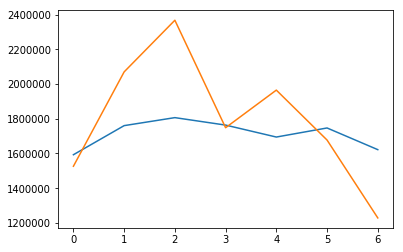

In [15]:
plt.plot(final.BUDforecast)
plt.plot(final.BUDActuals)

In [16]:
# final_numeric= final.ix[:,final.applymap(np.isreal).all(axis=0)]
# final_numeric.to_csv('LSTM_result_all.csv')
#final_numeric
final

,BUDle,BUDforecast,BUDAc,BUDActuals
0,BUDle-4,1592732.125,BUDAc-4,1526338.829
1,BUDle-5,1760442.500,BUDAc-5,2070232.414
2,BUDle-6,1806529.625,BUDAc-6,2367853.079
3,BUDle-7,1763533.500,BUDAc-7,1748440.507
4,BUDle-8,1694640.125,BUDAc-8,1965172.455
5,BUDle-9,1746953.625,BUDAc-9,1677321.591
6,BUDle-10,1621982.000,BUDAc-10,1228506.813


In [2]:
# from keras.preprocessing.sequence import TimeseriesGenerator

# # define generator
# n_input = 2
# n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# len(scaled_train)
# len(generator) # n_input = 2
# scaled_train

# # What does the first batch look like?
# X,y = generator[0]

# print(f'Given the Array: \n{X.flatten()}')
# print(f'Predict this y: \n {y}')

# # Let's redefine to get 12 months back and then predict the next month out
# n_input = 12
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# # What does the first batch look like?
# X,y = generator[0]

# print(f'Given the Array: \n{X.flatten()}')
# print(f'Predict this y: \n {y}')

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM

# # define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

# model.summary()

# # fit model
# model.fit_generator(generator,epochs=50)
# model.history.history.keys()

# loss_per_epoch = model.history.history['loss']
# plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

# first_eval_batch = scaled_train[-12:]
# first_eval_batch

# first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
# model.predict(first_eval_batch)
# scaled_test[0]


# test_predictions = []

# first_eval_batch = scaled_train[-n_input:]
# current_batch = first_eval_batch.reshape((1, n_input, n_features))
# current_batch.shape

# current_batch

# np.append(current_batch[:,1:,:],[[[99]]],axis=1)
# test_predictions = []

# first_eval_batch = scaled_train[-n_input:]
# current_batch = first_eval_batch.reshape((1, n_input, n_features))

# for i in range(len(test)):
    
#     # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
#     current_pred = model.predict(current_batch)[0]
    
#     # store prediction
#     test_predictions.append(current_pred) 
    
#     # update batch to now include prediction and drop first value
#     current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

# test_predictions
# scaled_test

# true_predictions = scaler.inverse_transform(test_predictions)
# true_predictions

# test

# # IGNORE WARNINGS
# test['Predictions'] = true_predictions

# test

# # test.plot(figsize=(12,8))
# # model.save('my_rnn_model.h5')

# # from keras.models import load_model
# # new_model = load_model('my_rnn_model.h5')

# # new_model.summary()

